In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Abstract
Oftentimes data is provided at certain discrete points, and when we need to evaluate the function at the intermediate points, we use interpolation techniques. The goal of this assignment was to construct interpolating functions based on initial dataset, using 2 methods: Lagrange polynomials and cubic splines. Then the results were compared using rms(root-mean-square)metric. It is clearly seen from graphs and from rms value, that cubic splines fitted data much more accurate than Lagrange polynomials. 

#Introduction

In this assignment we have a target function that we have to approximate: $f(x)=\frac{1}{1+25x^2}$ on interval $(-1,1)$ using the value of target function at positions $x=-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1$. The two interpolating methods used are:

* Lagrange polynomials. This method is a variant of more general polynomial method. This method is pretty straightforward: in general it is always possible to construct an $n$-degree polynomial passing through $n+1$ points. In this assignment the degree of polynomial is 8. In general polynomial interpolation is not very useful and high-order polynomials are rarely used. 

* Cubic spline interpolation. This method is a variant of more general spline interpolation. In general every segment between two initial data points is interpolated using a cubic function. Boundary value conditions allow us to compute coefficients of those cubic splines. This method is useful since it guarantees continuity of first and second derivatives, which is useful for many real-world applications(e.g. velocity and acceleration). 

#Methodology
##Lagrange polynomials

Lagrange polynomial of order n is constructed in a following way:
$$
f_n(x) = \sum_{i=0}^n L_i(x)f(x)
$$
$L_i$ is defined as: 
$$
L_i=\prod_{i\neq j} \frac{x-x_j}{x_i-x_j}
$$


In [ ]:
#This is target function
def f(x):
  return 1/(1+25*x**2)

#This function returns lagrange polynomial. Its inputs are target function: f, 
#positions for which we know values of target function: x0, and range of values on which we want to interpolate: x
def polynomial(f,x0,x):
  n=len(x0)
  S=0
  for i in range(n):
    L=1
    for j in range(n):
      if i!=j:
        L=L*(x-x0[j])/(x0[i]-x0[j])
    S=S+L*f(x0[i])
  return S

##Spline interpolation
Cubic function has $4$ degrees of freedom. We have $n=8$ intervals. Therefore we need 32 conditions. We construct $32x32$ matrix $A$ and vector $b$ with those conditions and try to solve equation $Ax=b$ where vector $x$ entails all the coefficients. Those conditions are:

* 2 conditions: First and last functions should pass through endpoints
$$a_1x_0^3+b_1x_0^2+c_1x_0+d_1=f(x_0)$$
$$a_8x_8^3+b_8x_8^2+c_8x_8+d_1=f(x_8)$$
* 14 conditions: The function values must be equal at the interior knots
$$a_{i-1}x_{i-1}^3+b_{i-1}x_{i-1}^2+c_{i-1}x_{i-1}+d_{i-1}=f(x_{i-1})$$
$$a_{i}x_{i-1}^3+b_{i}x_{i-1}^2+c_{i}x_{i-1}+d_{i}=f(x_{i-1})$$

For $i=2$ through $8$

* 7 conditions: The first derivatives at the interior knots must be equal

$$3a_{i-1}x_{i-1}^2+2b_{i-1}x_{i-1}+c_{i-1}=3a_{i}x_{i-1}^2+2b_{i}x_{i-1}+c_{i}$$

For $i=2$ through $8$

* 7 conditions: The second derivatives at the interior knots must be equal

$$6a_{i-1}x_{i-1}+2b_{i-1}=6a_{i}x_{i-1}+2b_{i}$$

For $i=2$ through $8$

* 2 conditions: The second derivatives at end points are zeros:

$$6a_{1}x_{0}+2b_{1}=0$$
$$6a_{8}x_{8}+2b_{8}=0$$

In [ ]:
#This function returns coefficients of splines. It has the same inputs as lagrange function. 
#Inside we can see 32 conditions from previous section
def spline_coeff(f,x0,x):
  A=np.zeros((32,32))
  b=np.zeros(32)

  A[0,0]=x0[0]**3
  A[0,1]=x0[0]**2
  A[0,2]=x0[0]
  A[0,3]=1
  b[0]=f(x0[0])
  A[1,28]=x0[8]**3
  A[1,29]=x0[8]**2
  A[1,30]=x0[8]
  A[1,31]=1
  b[1]=f(x0[8])

  A[2,0]=x0[1]**3
  A[2,1]=x0[1]**2
  A[2,2]=x0[1]
  A[2,3]=1
  b[2]=f(x0[1])
  A[3,4]=x0[1]**3
  A[3,5]=x0[1]**2
  A[3,6]=x0[1]
  A[3,7]=1
  b[3]=f(x0[1])

  A[4,4]=x0[2]**3
  A[4,5]=x0[2]**2
  A[4,6]=x0[2]
  A[4,7]=1
  b[4]=f(x0[2])
  A[5,8]=x0[2]**3
  A[5,9]=x0[2]**2
  A[5,10]=x0[2]
  A[5,11]=1
  b[5]=f(x0[2])

  A[6,8]=x0[3]**3
  A[6,9]=x0[3]**2
  A[6,10]=x0[3]
  A[6,11]=1
  b[6]=f(x0[3])
  A[7,12]=x0[3]**3
  A[7,13]=x0[3]**2
  A[7,14]=x0[3]
  A[7,15]=1
  b[7]=f(x0[3])

  A[8,12]=x0[4]**3
  A[8,13]=x0[4]**2
  A[8,14]=x0[4]
  A[8,15]=1
  b[8]=f(x0[4])
  A[9,16]=x0[4]**3
  A[9,17]=x0[4]**2
  A[9,18]=x0[4]
  A[9,19]=1
  b[9]=f(x0[4])

  A[10,16]=x0[5]**3
  A[10,17]=x0[5]**2
  A[10,18]=x0[5]
  A[10,19]=1
  b[10]=f(x0[5])
  A[11,20]=x0[5]**3
  A[11,21]=x0[5]**2
  A[11,22]=x0[5]
  A[11,23]=1
  b[11]=f(x0[5])

  A[12,20]=x0[6]**3
  A[12,21]=x0[6]**2
  A[12,22]=x0[6]
  A[12,23]=1
  b[12]=f(x0[6])
  A[13,24]=x0[6]**3
  A[13,25]=x0[6]**2
  A[13,26]=x0[6]
  A[13,27]=1
  b[13]=f(x0[6])

  A[14,24]=x0[7]**3
  A[14,25]=x0[7]**2
  A[14,26]=x0[7]
  A[14,27]=1
  b[14]=f(x0[7])
  A[15,28]=x0[7]**3
  A[15,29]=x0[7]**2
  A[15,30]=x0[7]
  A[15,31]=1
  b[15]=f(x0[7])

  A[16,0]=3*x0[1]**2
  A[16,1]=2*x0[1]
  A[16,2]=1
  A[16,3]=0
  A[16,4]=-3*x0[1]**2
  A[16,5]=-2*x0[1]
  A[16,6]=-1
  A[16,7]=0

  A[17,4]=3*x0[2]**2
  A[17,5]=2*x0[2]
  A[17,6]=1
  A[17,7]=0
  A[17,8]=-3*x0[2]**2
  A[17,9]=-2*x0[2]
  A[17,10]=-1
  A[17,11]=0
  
  A[18,8]=3*x0[3]**2
  A[18,9]=2*x0[3]
  A[18,10]=1
  A[18,11]=0
  A[18,12]=-3*x0[3]**2
  A[18,13]=-2*x0[3]
  A[18,14]=-1
  A[18,15]=0

  A[19,12]=3*x0[4]**2
  A[19,13]=2*x0[4]
  A[19,14]=1
  A[19,15]=0
  A[19,16]=-3*x0[4]**2
  A[19,17]=-2*x0[4]
  A[19,18]=-1
  A[19,19]=0

  A[20,16]=3*x0[5]**2
  A[20,17]=2*x0[5]
  A[20,18]=1
  A[20,19]=0
  A[20,20]=-3*x0[5]**2
  A[20,21]=-2*x0[5]
  A[20,22]=-1
  A[20,23]=0

  A[21,20]=3*x0[6]**2
  A[21,21]=2*x0[6]
  A[21,22]=1
  A[21,23]=0
  A[21,24]=-3*x0[6]**2
  A[21,25]=-2*x0[6]
  A[21,26]=-1
  A[21,27]=0

  A[22,24]=3*x0[7]**2
  A[22,25]=2*x0[7]
  A[22,26]=1
  A[22,27]=0
  A[22,28]=-3*x0[7]**2
  A[22,29]=-2*x0[7]
  A[22,30]=-1
  A[22,31]=0

  A[23,0]=6*x0[1]
  A[23,1]=2
  A[23,4]=-6*x0[1]
  A[23,5]=-2

  A[24,4]=6*x0[2]
  A[24,5]=2
  A[24,8]=-6*x0[2]
  A[24,9]=-2

  A[25,8]=6*x0[3]
  A[25,9]=2
  A[25,12]=-6*x0[3]
  A[25,13]=-2

  A[26,12]=6*x0[4]
  A[26,13]=2
  A[26,16]=-6*x0[4]
  A[26,17]=-2

  A[27,16]=6*x0[5]
  A[27,17]=2
  A[27,20]=-6*x0[5]
  A[27,21]=-2

  A[28,20]=6*x0[6]
  A[28,21]=2
  A[28,24]=-6*x0[6]
  A[28,25]=-2

  A[29,24]=6*x0[7]
  A[29,25]=2
  A[29,28]=-6*x0[7]
  A[29,29]=-2

  A[30,0]=6*x0[0]
  A[30,1]=2

  A[31,28]=6*x0[8]
  A[31,29]=2

  x=np.linalg.solve(A,b)
  return x

#This function obtains coefficients from previous function and constructs a piece-wise function
#For each of 8 intervals it returns its own cubic spline
def spline(f,x0,x):
  q=spline_coeff(f,x0,x)
  n=len(x)
  y=np.zeros(n)
  for i in range(n):
    if(x[i]>=-1 and x[i]<-0.75): y[i]=q[0]*x[i]**3+q[1]*x[i]**2+q[2]*x[i]+q[3]
    elif(x[i]>=-0.75 and x[i]<-0.5): y[i]=q[4]*x[i]**3+q[5]*x[i]**2+q[6]*x[i]+q[7]
    elif(x[i]>=-0.5 and x[i]<-0.25): y[i]=q[8]*x[i]**3+q[9]*x[i]**2+q[10]*x[i]+q[11]
    elif(x[i]>=-0.25 and x[i]<0): y[i]=q[12]*x[i]**3+q[13]*x[i]**2+q[14]*x[i]+q[15]
    elif(x[i]>=0 and x[i]<0.25): y[i]=q[16]*x[i]**3+q[17]*x[i]**2+q[18]*x[i]+q[19]
    elif(x[i]>=0.25 and x[i]<0.5): y[i]=q[20]*x[i]**3+q[21]*x[i]**2+q[22]*x[i]+q[23]
    elif(x[i]>=0.5 and x[i]<0.75): y[i]=q[24]*x[i]**3+q[25]*x[i]**2+q[26]*x[i]+q[27]
    elif(x[i]>=0.75 and x[i]<=1): y[i]=q[28]*x[i]**3+q[29]*x[i]**2+q[30]*x[i]+q[31]
    else: y[i]=0
  return y

#Results
##Lagrange polynomials

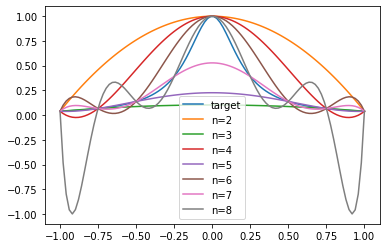

In [ ]:
x=np.linspace(-1,1,100)
x0=np.array([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
plt.plot(x,f(x),label='target')
plt.plot(x,polynomial(f,np.array([-1,0,1]),x),label='n=2')
plt.plot(x,polynomial(f,np.array([-1,-0.75,0.75,1]),x),label='n=3')
plt.plot(x,polynomial(f,np.array([-1,-0.75,0,0.75,1]),x),label='n=4')
plt.plot(x,polynomial(f,np.array([-1,-0.75,-0.5,0.5,0.75,1]),x),label='n=5')
plt.plot(x,polynomial(f,np.array([-1,-0.75,-0.5,0,0.5,0.75,1]),x),label='n=6')
plt.plot(x,polynomial(f,np.array([-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1]),x),label='n=7')
plt.plot(x,polynomial(f,x0,x),label='n=8')
plt.legend()
plt.show()

##Cubic splines

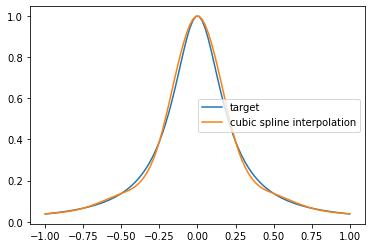

In [ ]:
x=np.linspace(-1,1,100)
x0=np.array([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
plt.plot(x,f(x),label='target')
plt.plot(x,spline(f,x0,x),label='cubic spline interpolation')
plt.legend()
plt.show() 

##Calculating errors. 

To compute errors we first find a difference between real value of a function and its approximation as specific points. Then we compute root-mean-square of those errors:

$$rms=\sqrt{\frac{\sum_i (f(x_i)-g(x_i)^2}{n}}$$

Where $f(x)$ is real function and $g(x)$ is interpolated function 

In [ ]:
#We redefine spline function so it now can return a value at a single point, rather than a range of points.
#This will be required for calculation of rms
def spline_point(f,x0,x):
  y=0
  q=spline_coeff(f,x0,x)
  if(x>=-1 and x<-0.75): y=q[0]*x**3+q[1]*x**2+q[2]*x+q[3]
  elif(x>=-0.75 and x<-0.5): y=q[4]*x**3+q[5]*x**2+q[6]*x+q[7]
  elif(x>=-0.5 and x<-0.25): y=q[8]*x**3+q[9]*x**2+q[10]*x+q[11]
  elif(x>=-0.25 and x<0): y=q[12]*x**3+q[13]*x**2+q[14]*x+q[15]
  elif(x>=0 and x<0.25): y=q[16]*x**3+q[17]*x**2+q[18]*x+q[19]
  elif(x>=0.25 and x<0.5): y=q[20]*x**3+q[21]*x**2+q[22]*x+q[23]
  elif(x>=0.5 and x<0.75): y=q[24]*x**3+q[25]*x**2+q[26]*x+q[27]
  elif(x>=0.75 and x<=1): y=q[28]*x**3+q[29]*x**2+q[30]*x+q[31]
  else: y=0
  return y

#This function computes rms for polynomials
def rms_poly(f,x0):
  z=np.zeros(8)
  n=len(z)
  for i in range(8):
    z[i]=-0.875+0.25*i
  rms=0
  for i in range(8):
    rms=rms+(polynomial(f,x0,z[i])-f(z[i]))**2
  rms=np.sqrt(rms/n)
  return rms

#This function computes rms for splines
def rms_spline(f,x0):
  z=np.zeros(8)
  n=len(z)
  for i in range(8):
    z[i]=-0.875+0.25*i
  rms=0
  for i in range(8):
    rms=rms+(spline_point(f,x0,z[i])-f(z[i]))**2
  rms=np.sqrt(rms/n)
  return rms

In [ ]:
print("rms for Lagrange polynomial of order 2:",rms_poly(f,[-1,0,1]))
print("rms for Lagrange polynomial of order 3:",rms_poly(f,[-1,-0.75,0.75,1]))
print("rms for Lagrange polynomial of order 4:",rms_poly(f,[-1,-0.75,0,0.75,1]))
print("rms for Lagrange polynomial of order 5:",rms_poly(f,[-1,-0.75,-0.5,0.5,0.75,1]))
print("rms for Lagrange polynomial of order 6:",rms_poly(f,[-1,-0.75,-0.5,0,0.5,0.75,1]))
print("rms for Lagrange polynomial of order 7:",rms_poly(f,[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1]))
print("rms for Lagrange polynomial of order 8:",rms_poly(f,x0))
print("rms for cubic splines",rms_spline(f,x0))


rms for Lagrange polynomial of order 2: 0.45081493646715765
rms for Lagrange polynomial of order 3: 0.31557509181633503
rms for Lagrange polynomial of order 4: 0.2689615226066416
rms for Lagrange polynomial of order 5: 0.2508672321839283
rms for Lagrange polynomial of order 6: 0.1489901942223163
rms for Lagrange polynomial of order 7: 0.11852529548442549
rms for Lagrange polynomial of order 8: 0.46251973655578965
rms for cubic splines 0.03060529156150635


##Interpetation of results

Lagrange polynomial method is known not to be very reliable for high-degree polynomials. From the graph we can see that increasing the degree makes the interpolated function closer to the target function, but at degree 8 its behaviour is very deviating for intermediate points. 

Cubic splines method works well and from the graph we can see that target function is approximated very closely.

Those results are also confirmed by rms metric. We can see that increasing that the error of Lagrange method is not tending to zero, but rather jumps back at the degree 8. The most accurate degree is degree 7. But even then it is 4 times less efficient than cubic splines

#Conclusion

As was initially assumed, cubic splines performed much better than Lagrange polynomials. This experiment can be repeated for different functions or different regions of the same function, and for different variants of polynomial interpolation(e.g. Newton) and spline interpolation(e.g. linear, cubic). The results may vary for those new setups.

#References
* Lecture on interpolation by Prof. Abdikamalov:
https://www.youtube.com/watch?v=_FFJsZkywRY
* Chapra, S. C., & Canale, R. P. (2011). Numerical methods for engineers